# Question 1

In [9]:
from sympy import *
init_printing()
import matplotlib.pyplot as plt
x, y = symbols('x y')

In [10]:
def f1(x, y):
    return (x**2+y**2-1)/(x**2+y**2+1)

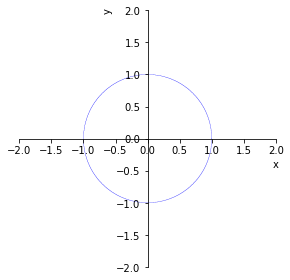

In [11]:
# trace la fonctions phi sur un voisinage
plot_implicit(f1(x, y), (x, -2, 2), (y, -2, 2),aspect_ratio=(1,1))

# Question 2

In [12]:
def g(x, y):
    return y**2-1+sin(pi*x)

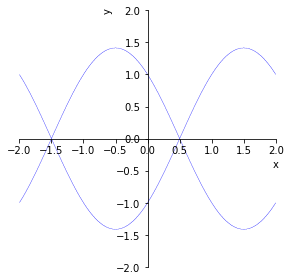

In [13]:
plot_implicit(g(x, y), (x, -2, 2), (y, -2, 2),aspect_ratio=(1,1))

développement limité au voisinage du point (0,1)

In [14]:
a0, a1, a2, a3,a4,a5,a6= symbols('a_0 a_1 a_2 a_3 a_4 a_5 a_6')
DL = a0+a1*x +a2*x**2+a3*x**3+a4*x**4+a5*x**5+ O(x**6)
DL

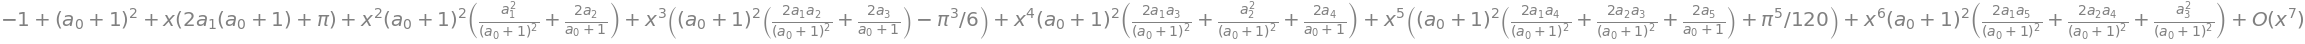

In [15]:
DL2 = series(g(x, DL+1), x, 0, 7)
DL2

In [17]:
S = solve([DL2.coeff(x, k) for k in range(0, 6)], a0,a1, a2,a3,a4,a5, dict = True)
S

In [18]:
approximation_polynomiale = (DL.subs(S[1])).removeO()
approximation_polynomiale

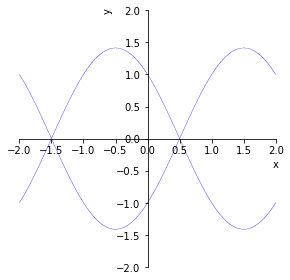

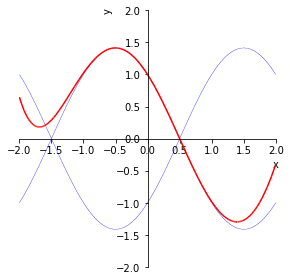

In [19]:
figure1 = plot_implicit(g(x, y), (x, -2,2), (y, -2,2),aspect_ratio=(1,1))
figure2 = plot((approximation_polynomiale+1 ).subs(x, x), (x,-2,2), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()

# Question 3

In [ ]:
def sinc(x):
    if x!=0:
        return sin(x)/x
    else:
        return 1

In [ ]:
def h(x,y):
    return sinc(x)-sinc(y)

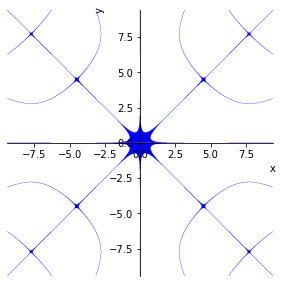

In [ ]:
plot_implicit(h(x, y), (x, -3*pi, 3*pi), (y, -3*pi, 3*pi),aspect_ratio=(1,1))

In [ ]:
a0, a1, a2, a3 = symbols('a_0 a_1 a_2 a_3 ')
DL = a0+a1*x + O(x**2)
DL

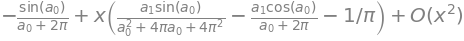

In [ ]:
DL2 = series(h(x+pi, DL+2*pi), x, 0, 2)
DL2

In [ ]:
S = solve([DL2.coeff(x, k) for k in range(0, 3)], a0,a1, a2, dict = True)
S

On a bien $\psi(\pi)=2\pi$ donc on supprime la deuxième solution.

In [ ]:
approximation_polynomiale = (DL.subs(S[0])).removeO()
approximation_polynomiale

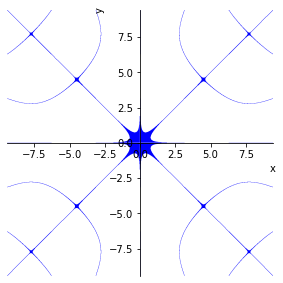

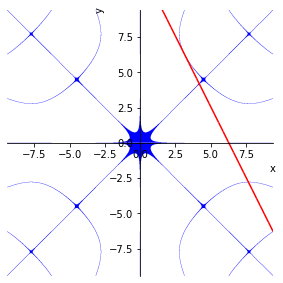

In [ ]:
figure1 = plot_implicit(h(x, y), (x, -3*pi, 3*pi), (y, -3*pi, 3*pi),aspect_ratio=(1,1))
figure2 = plot((approximation_polynomiale+2*pi ).subs(x, x-pi ), (x,-3*pi,3*pi), show=False, line_color='red')
figure1.extend(figure2)
figure1.show()